In [5]:
from collections import Counter
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_18152\268362534.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if prices[i] > prices[i-1]:  # Salita
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_18152\268362534.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif prices[i] < prices[i-1]:  # Discesa


Numero medio di giorni in una salita: 1.74
Numero medio di giorni in una discesa: 1.72


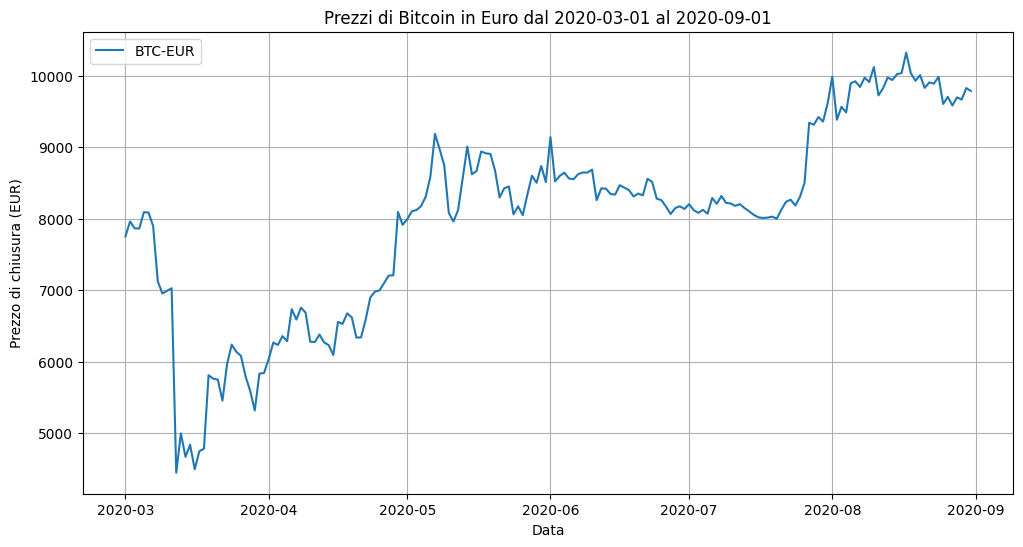

Media mobile delle salite consecutive (ultimi 7 giorni): [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.5, 1.5, 1.3333333333333333, 1.0, 1.0, 1.3333333333333333, 2.0, 2.0, 3.0, 3.0, 1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 3.0, 4.0, 4.0, 2.5, 2.0, 1.3333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 2.0, 4.0, 5.0, 6.0, 6.0, 6.0, 6.0, 5.0, 2.5, 2.5, 2.5, 2.5, 5.0, 6.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 2.0, 3.0, 3.0, 2.0, 2.5, 2.0, 1.5, 2.0, 2.0, 1.0, 2.0, 2.0, 1.5, 1.5, 1.3333333333333333, 1.3333333333333333, 1.5, 1.3333333333333333, 1.5, 1.3333333333333333, 1.0, 1.0, 1.3333333333333333, 1.5, 1.5, 1.5, 2.0, 1.5, 1.5, 1.5, 1.3333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.5, 1.5, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.5, 2.0, 2.5, 2.0, 2.0, 2.5, 2.5, 2.0, 2.0, 2.0, 1.3333333333333333, 1.3333333333333333, 1.5, 1.3333333333333333, 1.5, 1.33333

In [6]:
def get_bitcoin_prices(start_date, end_date, currency='EUR'):
    # Scarica i dati di chiusura di Bitcoin in Euro tra le date specificate
    btc_data = yf.download('BTC-EUR', start=start_date, end=end_date)
    return btc_data['Close']

def calculate_consecutive_trends(prices):
    # Lista per contare i giorni di salita e discesa
    up_days = []
    down_days = []

    # Variabili per tracciare le salite e discese consecutive
    current_trend = None
    count = 0

    for i in range(1, len(prices)):
        if prices[i] > prices[i-1]:  # Salita
            if current_trend == 'up':
                count += 1
            else:
                if current_trend == 'down':
                    down_days.append(count)
                current_trend = 'up'
                count = 1
        elif prices[i] < prices[i-1]:  # Discesa
            if current_trend == 'down':
                count += 1
            else:
                if current_trend == 'up':
                    up_days.append(count)
                current_trend = 'down'
                count = 1

    # Aggiungi l'ultima sequenza
    if current_trend == 'up':
        up_days.append(count)
    elif current_trend == 'down':
        down_days.append(count)

    # Calcola le medie
    avg_up_days = sum(up_days) / len(up_days) if up_days else 0
    avg_down_days = sum(down_days) / len(down_days) if down_days else 0

    return avg_up_days, avg_down_days

def calculate_moving_average_trends(prices, N):
    # Inizializzazione delle liste per le medie mobili delle salite e discese consecutive
    up_trends_ma = []
    down_trends_ma = []

    for i in range(len(prices) - N + 1):
        # Segmento di prezzi corrente di lunghezza N
        segment = prices[i:i+N]
        avg_up, avg_down = calculate_consecutive_trends(segment)
        up_trends_ma.append(avg_up)
        down_trends_ma.append(avg_down)

    return up_trends_ma, down_trends_ma

def calculate_max_consecutive_trends(prices, M):
    # Inizializzazione delle liste per le massime salite e discese consecutive
    max_up_trends = []
    max_down_trends = []

    for i in range(len(prices) - M + 1):
        segment = prices[i:i+M]
        max_up, max_down = 0, 0
        current_trend = None
        count = 0

        for j in range(1, len(segment)):
            if segment[j] > segment[j-1]:  # Salita
                if current_trend == 'up':
                    count += 1
                else:
                    if current_trend == 'down':
                        max_down = max(max_down, count)
                    current_trend = 'up'
                    count = 1
            elif segment[j] < segment[j-1]:  # Discesa
                if current_trend == 'down':
                    count += 1
                else:
                    if current_trend == 'up':
                        max_up = max(max_up, count)
                    current_trend = 'down'
                    count = 1

        # Aggiorna i valori massimi
        if current_trend == 'up':
            max_up = max(max_up, count)
        elif current_trend == 'down':
            max_down = max(max_down, count)

        max_up_trends.append(max_up)
        max_down_trends.append(max_down)

    return max_up_trends, max_down_trends

def plot_prices(prices, start_date, end_date):
    plt.figure(figsize=(12, 6))
    plt.plot(prices, label="BTC-EUR")
    plt.title(f"Prezzi di Bitcoin in Euro dal {start_date} al {end_date}")
    plt.xlabel("Data")
    plt.ylabel("Prezzo di chiusura (EUR)")
    plt.legend()
    plt.grid()
    plt.show()

# Esecuzione del codice
start_date = '2020-03-01'
end_date = '2020-09-01'
N = 7  # Periodo per la media mobile
M = 7  # Periodo per il massimo di salite/discese consecutive

# 1. Scarica i prezzi di chiusura di Bitcoin
btc_prices = get_bitcoin_prices(start_date, end_date)

# 2. Calcola il numero medio di salite e discese consecutive
avg_up_days, avg_down_days = calculate_consecutive_trends(btc_prices)
print(f"Numero medio di giorni in una salita: {avg_up_days:.2f}")
print(f"Numero medio di giorni in una discesa: {avg_down_days:.2f}")

# 3. Mostra il grafico dei prezzi di Bitcoin
plot_prices(btc_prices, start_date, end_date)

# 4. Calcola la media mobile delle salite e discese consecutive
up_trends_ma, down_trends_ma = calculate_moving_average_trends(btc_prices.values, N)

# 5. Mostra le liste delle medie mobili
print(f"Media mobile delle salite consecutive (ultimi {N} giorni): {up_trends_ma}")
print(f"Media mobile delle discese consecutive (ultimi {N} giorni): {down_trends_ma}")

# 6. Calcola il numero massimo di salite e discese consecutive
max_up_trends, max_down_trends = calculate_max_consecutive_trends(btc_prices.values, M)

# 7. Mostra le liste dei massimi
print(f"Massimo numero di giorni in una salita consecutiva (ultimi {M} giorni): {max_up_trends}")
print(f"Massimo numero di giorni in una discesa consecutiva (ultimi {M} giorni): {max_down_trends}")

In [11]:
def calculate_trend_statistics(prices):
    up_lengths = []
    down_lengths = []

    current_trend = None
    count = 0

    for i in range(1, len(prices)):
        if prices[i] > prices[i-1]:  # Salita
            if current_trend == 'up':
                count += 1
            else:
                if current_trend == 'down':
                    down_lengths.append(count)
                current_trend = 'up'
                count = 1
        elif prices[i] < prices[i-1]:  # Discesa
            if current_trend == 'down':
                count += 1
            else:
                if current_trend == 'up':
                    up_lengths.append(count)
                current_trend = 'down'
                count = 1

    # Aggiungi l'ultima sequenza
    if current_trend == 'up':
        up_lengths.append(count)
    elif current_trend == 'down':
        down_lengths.append(count)

    return up_lengths, down_lengths

def print_trend_statistics(trend_lengths, trend_type):
    trend_counter = Counter(trend_lengths)
    total_trends = sum(trend_counter.values())

    print(f"\nStatistiche sulle {trend_type}:")
    for length, count in sorted(trend_counter.items()):
        percentage = (count / total_trends) * 100
        print(f"{length} giorni: {count} ({percentage:.2f}%)")

# Esecuzione del codice
up_lengths, down_lengths = calculate_trend_statistics(btc_prices.values)

# Stampa delle statistiche
print_trend_statistics(down_lengths, "discese")
print_trend_statistics(up_lengths, "salite")


Statistiche sulle discese:
1 giorni: 36 (67.92%)
2 giorni: 5 (9.43%)
3 giorni: 6 (11.32%)
4 giorni: 3 (5.66%)
5 giorni: 3 (5.66%)

Statistiche sulle salite:
1 giorni: 33 (62.26%)
2 giorni: 12 (22.64%)
3 giorni: 5 (9.43%)
4 giorni: 1 (1.89%)
7 giorni: 1 (1.89%)
9 giorni: 1 (1.89%)


In [42]:
import itertools

valori_c1 = [1, 5, 89]
valori_c2 = [-5, 0, 5]

lista_valori_coefficienti = [valori_c1, valori_c2]

combinazioni = list(itertools.product(*lista_valori_coefficienti))

combinazioni_liste = [list(combinazione) for combinazione in combinazioni]

combinazioni_liste

[[1, -5], [1, 0], [1, 5], [5, -5], [5, 0], [5, 5], [89, -5], [89, 0], [89, 5]]